# Task 2 - GSEA Hallmark analysis for each cluster
This notebook does a GSEA Hallmark analysis for each cluster (collapsing all cells from each cluster, as a bulk rna seq).

This notebook is based on the single-cell best practices book (https://github.com/theislab/single-cell-best-practices/). For further explanations of the applied methods please refer to above source.

# Gene set enrichment and pathway analysis 

### Prepare and explore the data

In [1]:
import os
os.environ['R_HOME'] = '/home/icb/till.richter/anaconda3/envs/da_env/lib/R'

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random
import session_info

anndata2ri.activate()

In [3]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [4]:
%load_ext rpy2.ipython

In [5]:
!python -m rpy2.situation

rpy2 version:
3.4.5
Python version:
3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Looking for R's HOME:
    Environment variable R_HOME: /home/icb/till.richter/anaconda3/envs/da_env/lib/R
    Calling `R RHOME`: /usr/lib64/R
    Environment variable R_LIBS_USER: ~/R/x86_64-conda-linux-gnu-library/4.1
R's additions to LD_LIBRARY_PATH:

R version:
    In the PATH: R version 3.6.0 (2019-04-26) -- "Planting of a Tree"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:
  include:
  ['/home/icb/till.richter/anaconda3/envs/da_env/lib/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'rt', 'dl', 'm', 'iconv', 'icuuc', 'icui18n']
  library_dirs:
  ['/home/icb/till.richter/anaconda3/envs/da_env/lib', '/home/icb/till.richter/anaconda3/envs/da_env/lib/R/lib', '/home/icb/till.richter/anaconda3/envs/da_env/lib']
  extra_compile_args:
  []
  extra_link_args:
  ['-Wl,--export-dynamic', '-fopenmp', '-Wl,-O2', '-Wl,--sort-

In [6]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    library(fgsea)
    library(AUCell)
    library(ggplot2)
})

In [8]:
adata_read = sc.read_h5ad('../data/adata/processed_adata1.h5ad')
adata_read.obs

,sample_id,sample_nr,donor,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,log_counts,n_counts,n_genes,size_factors
AAACCCAAGATCACCT-1-1-0-0,9591-2D,0,mouse,1438,7.271704,3167.0,8.060856,31.796653,43.195453,54.152195,70.382065,158.0,5.068904,4.988949,8.060540,3167.0,1438,0.802188
AAACCCAAGCACACAG-1-1-0-0,9591-2D,0,mouse,2030,7.616284,5085.0,8.534247,28.456244,40.255654,50.855457,66.096362,255.0,5.545177,5.014749,8.534050,5085.0,2030,1.280009
AAACCCAAGGCATCTT-1-1-0-0,9591-2D,0,mouse,1581,7.366445,3452.0,8.146998,32.097335,43.134415,53.418308,68.684820,213.0,5.365976,6.170336,8.146709,3452.0,1581,0.853211
AAACCCAAGGGTAGCT-1-1-0-0,9591-2D,0,mouse,2930,7.983099,9941.0,9.204523,34.513630,46.604969,55.577910,67.629011,885.0,6.786717,8.902525,9.204423,9941.0,2930,2.027462
AAACCCACACACGGTC-1-1-0-0,9591-2D,0,mouse,650,6.478510,1089.0,6.993933,32.690542,43.801653,58.677686,86.225895,51.0,3.951244,4.683196,6.993015,1089.0,650,0.255509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTAGCTAAA-1-1-0-0,9591-2D,0,mouse,3308,8.104401,11144.0,9.318747,29.872577,41.358579,51.390883,64.348528,451.0,6.113682,4.047021,9.318657,11144.0,3308,2.719731
TTTGTTGGTTGCTCGG-1-1-0-0,9591-2D,0,mouse,546,6.304449,970.0,6.878326,38.556701,51.340206,64.329897,95.257732,122.0,4.812184,12.577319,6.877296,970.0,546,0.196757
TTTGTTGTCCACTTTA-1-1-0-0,9591-2D,0,mouse,433,6.073045,594.0,6.388561,30.639731,43.939394,60.774411,100.000000,23.0,3.178054,3.872054,6.386879,594.0,433,0.159965
TTTGTTGTCCCGTTGT-1-1-0-0,9591-2D,0,mouse,1063,6.969791,1920.0,7.560601,30.729167,41.197917,52.343750,70.677083,75.0,4.330733,3.906250,7.560081,1920.0,1063,0.460149


In [9]:
adata = adata_read.copy()

In [10]:
adata.layers['counts'] = adata.X

In [18]:
adata.obs['group'] = adata.obs['louvain_r0.5'].astype('string')

In [20]:
# find DE genes by t-test
sc.tl.rank_genes_groups(adata, 'group', method='t-test', key_added = "t-test")

In [21]:
names0 = adata.uns['t-test']['names']['0']
pvals0 = adata.uns['t-test']['pvals']['0']
adj_pvals0 = adata.uns['t-test']['pvals_adj']['0']
logfc0 = adata.uns['t-test']['logfoldchanges']['0']

names1 = adata.uns['t-test']['names']['1']
pvals1 = adata.uns['t-test']['pvals']['1']
adj_pvals1 = adata.uns['t-test']['pvals_adj']['1']
logfc1 = adata.uns['t-test']['logfoldchanges']['1']

names2 = adata.uns['t-test']['names']['2']
pvals2 = adata.uns['t-test']['pvals']['2']
adj_pvals2 = adata.uns['t-test']['pvals_adj']['2']
logfc2 = adata.uns['t-test']['logfoldchanges']['2']

names3 = adata.uns['t-test']['names']['3']
pvals3 = adata.uns['t-test']['pvals']['3']
adj_pvals3 = adata.uns['t-test']['pvals_adj']['3']
logfc3 = adata.uns['t-test']['logfoldchanges']['3']

names4 = adata.uns['t-test']['names']['4']
pvals4 = adata.uns['t-test']['pvals']['4']
adj_pvals4 = adata.uns['t-test']['pvals_adj']['4']
logfc4 = adata.uns['t-test']['logfoldchanges']['4']

# Create some Pandas dataframes from some data.
df0 = pd.DataFrame({'Gene Names': names0, 'PVAL': pvals0, 'Adjusted PVAL': adj_pvals0, 'logFC': logfc0})
df1 = pd.DataFrame({'Gene Names': names1, 'PVAL': pvals1, 'Adjusted PVAL': adj_pvals1, 'logFC': logfc1})
df2 = pd.DataFrame({'Gene Names': names2, 'PVAL': pvals2, 'Adjusted PVAL': adj_pvals2, 'logFC': logfc2})
df3 = pd.DataFrame({'Gene Names': names3, 'PVAL': pvals3, 'Adjusted PVAL': adj_pvals3, 'logFC': logfc3})
df4 = pd.DataFrame({'Gene Names': names4, 'PVAL': pvals4, 'Adjusted PVAL': adj_pvals4, 'logFC': logfc4})

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('../results/task2/9591-2D/9591-2D_de_genes.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df0.to_excel(writer, sheet_name='Cluster0')
df1.to_excel(writer, sheet_name='Cluster1')
df2.to_excel(writer, sheet_name='Cluster2')
df3.to_excel(writer, sheet_name='Cluster3')
df4.to_excel(writer, sheet_name='Cluster4')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [22]:
adata.obs['group']

AAACCCAAGATCACCT-1-1-0-0    1
AAACCCAAGCACACAG-1-1-0-0    1
AAACCCAAGGCATCTT-1-1-0-0    1
AAACCCAAGGGTAGCT-1-1-0-0    1
AAACCCACACACGGTC-1-1-0-0    0
                           ..
TTTGTTGGTAGCTAAA-1-1-0-0    1
TTTGTTGGTTGCTCGG-1-1-0-0    2
TTTGTTGTCCACTTTA-1-1-0-0    2
TTTGTTGTCCCGTTGT-1-1-0-0    0
TTTGTTGTCGAGTACT-1-1-0-0    3
Name: group, Length: 16747, dtype: category
Categories (5, string): [0, 1, 2, 3, 4]

In [23]:
celltype_condition0 = '0'
celltype_condition1 = '1'
celltype_condition2 = '2'
celltype_condition3 = '3'
celltype_condition4 = '4'

In [24]:
celltype_condition = celltype_condition4

In [26]:
adata.uns['t-test']['names'][celltype_condition]

array(['Rpl13', 'Rpl6', 'Rps4x', ..., 'Fosb', 'Krt19', 'Spp1'],
      dtype=object)

In [27]:
# extract ranked gene names and export to r
ranked_genes_ = adata.uns['t-test']['names'][celltype_condition]

In [28]:
%%R -i ranked_genes_
ranked_genes = ranked_genes_
head(ranked_genes)

[1] "Rpl13" "Rpl6"  "Rps4x" "Rps11" "Rps24" "Rps20"


In [29]:
# compute ranks and export to r
stats_ = adata.uns['t-test']['scores'][celltype_condition]

In [30]:
%%R -i stats_
stats = stats_

In [31]:
%%R
names(stats) = ranked_genes

In [32]:
%R -o stats

In [33]:
stats_df = pd.DataFrame(stats, index=ranked_genes_, columns=['Stats'])

### Cluster-level gene set enrichment analysis with fgsea

In [34]:
# MARK THESE GENE SETS LATER IN THE EXCEL TABLE

### Cluster 0
# HALLMARK_TNFA_SIGNALING_VIA_NFKB
# HALLMARK_TGF_BETA_SIGNALING

### Cluster 1
# HALLMARK_MYC_TARGETS_V1

### Custer 2
# HALLMARK_HYPOXIA
# HALLMARK_GLYCOLYSIS
# HALLMARK_MTORC1_SIGNALING
# HALLMARK_FATTY_ACID_METABOLISM

### Cluster 3
# HALLMARK_G2M_CHECKPOINT
# HALLMARK_MITOTIC_SPINDLE

### Cluster 4
# HALLMARK_E2F_TARGETS
# HALLMARK_G2M_CHECKPOINT

In [35]:
%%R
# pathways <- gmtPathways('../data/Hallmark/9591_2D/Cluster0/HALLMARK_TNFA_SIGNALING_VIA_NFKB.v7.5.1.gmt')
all_pathways <- gmtPathways('../data/Hallmark/h.all.v7.5.1.symbols.gmt')

In [36]:
%%R
my_pathways <- all_pathways['HALLMARK_MITOTIC_SPINDLE']
my_pathways <- all_pathways

In [37]:
from pyorthomap import FindOrthologs 
# then create the find orthogues object using correct datasets and attributes
# use help(FindOrthologs)
hs2mm = FindOrthologs(
          host = 'http://www.ensembl.org',
          mart = 'ENSEMBL_MART_ENSEMBL',
          from_dataset = 'hsapiens_gene_ensembl',
          to_dataset = 'mmusculus_gene_ensembl',
          from_filters = 'hgnc_symbol',
          from_values = ['TP53', 'TERT'],
          to_attributes = ['external_gene_name'],
          to_homolog_attribute = 'mmusculus_homolog_ensembl_gene',
          from_gene_id_name = 'human_ensembl_gene_id',
          to_gene_id_name = 'mouse_ensembl_gene_id'
    )
    
hs2mm.map()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.29it/s]


,external_gene_name,mouse_ensembl_gene_id,human_ensembl_gene_id,hgnc_symbol
0,Tert,ENSMUSG00000021611,ENSG00000164362,TERT
1,Trp53,ENSMUSG00000059552,ENSG00000141510,TP53


In [38]:
from pyorthomap import findOrthologsMmHs, findOrthologsHsMm
orthologies_mmhs = findOrthologsMmHs(from_filters = 'external_gene_name',
                  from_values = ranked_genes_).map()
                  # from_values = [list(stats_df.index)]).map() # [stats.gene.names]).map()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:04<00:00,  8.46it/s]


In [39]:
%%R -i orthologies_mmhs

# reorder the conversion table by names(stats)
# mm2hs <- mm2hs[match(names(stats), mm2hs$external_gene_name),]
orthologies_mmhs <- orthologies_mmhs[match(names(stats), orthologies_mmhs$external_gene_name),]
keep <- !is.na(orthologies_mmhs$hgnc_symbol)
stats <- stats[keep]
names(stats) <- orthologies_mmhs$hgnc_symbol[keep]
# names(stats)

In [40]:
%%R -o stats_names
stats_names <- names(stats)

In [41]:
stats_names

'RPL13','RPL6','RPS11',...,'FOSB','KRT19','SPP1'


In [42]:
%%R
names(stats) <- stats_names

In [43]:
%%R 
fgseaRes <- fgsea(pathways = my_pathways, 
                  stats    = stats,
                  eps      = 0.0,
                  minSize  = 15,
                  maxSize  = 500)

In [44]:
%%R
pathway <- fgseaRes[[1]]
pval <- fgseaRes[[2]]
padj <- fgseaRes[[3]]
log2err <- fgseaRes[[4]]
ES <- fgseaRes[[5]]
NES <- fgseaRes[[6]]
size <- fgseaRes[[7]]

In [45]:
%R -o pathway
%R -o pval
%R -o padj
%R -o log2err
%R -o ES
%R -o NES
%R -o size

In [46]:
df = pd.DataFrame({'Pathway': np.array(pathway), 'PVAL': np.array(pval), 'Adjusted PVAL': np.array(padj), 'log2 Error': np.array(log2err), 'ES': np.array(ES), 'NES': np.array(NES), 'Size': np.array(size)})
df.to_excel('../results/task2/9591-2D/9591-2D_fgsea_cluster' + celltype_condition + '.xlsx')

In [47]:
%%R
ggdat <- fgseaRes[order(fgseaRes$padj, decreasing=FALSE), ][1:20,]

In [48]:
%%R
saveRDS(ggdat, file = "cache/9591-2D/ggdat4.rds")
saveRDS(pathway, file = "cache/9591-2D/pathway4.rds")
saveRDS(padj, file = "cache/9591-2D/padj4.rds")


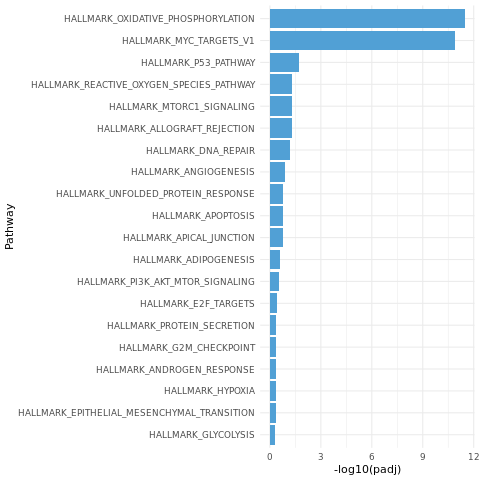

In [49]:
%%R
ggplot(ggdat, aes(x=reorder(pathway, -log10(padj)), y = -log10(padj))) +
    geom_bar(stat="identity", fill = "#51A0D5") + coord_flip() +
    xlab('Pathway') + theme_minimal()

In [ ]:
%%R
ggplot2(ggdat, aes(x=reorder(pathway, -log10(padj)), y = -log10(padj))) +
    geom_bar(stat="identity", fill = "#51A0D5") + coord_flip() +
    xlab('Pathway') + theme_minimal()

In [47]:
save_dir = '../results/task2/9591-2D/9591-2D_fgsea_cluster' + celltype_condition + '.pdf'

In [48]:
"""
%%R -i save_dir
ggsave(
  # 'git/isf_pancreatic_cancer/latest_notebook/figures/fgsea/9591-2D/cluster0.pdf',
  save_dir,
  plot = last_plot(),
  device = NULL,
  path = NULL,
  scale = 1,
  width = NA,
  height = NA,
  units = c("in", "cm", "mm", "px"),
  dpi = 300,
  limitsize = TRUE,
  bg = NULL,
)
"""

'\n%%R -i save_dir\nggsave(\n  # \'git/isf_pancreatic_cancer/latest_notebook/figures/fgsea/9591-2D/cluster0.pdf\',\n  save_dir,\n  plot = last_plot(),\n  device = NULL,\n  path = NULL,\n  scale = 1,\n  width = NA,\n  height = NA,\n  units = c("in", "cm", "mm", "px"),\n  dpi = 300,\n  limitsize = TRUE,\n  bg = NULL,\n)\n'

In [49]:
%%R
head(ggdat, n=1)

                   pathway         pval         padj  log2err         ES
1: HALLMARK_MYC_TARGETS_V1 6.903036e-25 3.313457e-23 1.295123 -0.5807401
         NES size                            leadingEdge
1: -2.218419  191 SLC25A3,LDHA,RPS3,SERBP1,RPL18,RAN,...


In [50]:
del adata.uns
del adata.obs

In [51]:
# put counts back
adata.X = adata.layers['counts']